<a href="https://colab.research.google.com/github/PoornaManujaya/Machine-Learning-Begginer-/blob/main/Hand_Written_Digits_Recognision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf #deep learning library. Tesnsors are multi-dimentional arrays

mnist = tf.keras.datasets.mnist #mnist is dataset of 28x28 of images of handwritten digits and their labels
(X_train, y_train),(X_test, y_test) = mnist.load_data() #unpacks images to datasets

#scales between 0 and 1
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
#A sequentail model is what we're going to use the most of the time. It just means things are going to do in direct order.
#A feed forward model. No going backwards...for now.
model = tf.keras.models.Sequential()

In [4]:
model.add(tf.keras.layers.Flatten()) #takes 28x28 and makes 1x784

In [5]:
from keras.activations import softmax
#This layer has 128 units. The activation function is relu, short for rectified linear.
#Currently relu is the activation function as default
#Adding two dense layers
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu)) #simple fully connected layer, 128 layers, relu activated
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))

#Adding final layer
#1 node per possuble number prediction (Here we have to predict 0-9 numbers. Hence we need 10 layers)
#In this case, our activation function is softwmax function. since we are really actually looking for something more 1.
#Softmax is an activation function that scales numbers/logits into probabilities. The output of a Softmax is a vector (say v ) with probabilities of each possible outcome. The probabilities in vector v sums to one for all possible outcomes or classes.
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax)) #our output layer. 10 units for 10 classes.

In [6]:
model.compile(
    optimizer="adam", #Good default optimizer to go with
    loss="sparse_categorical_crossentropy", #calculates error
    metrics=["accuracy"]) #what to track

In [7]:
model.fit(X_train,y_train, epochs=3) #trains the model

Epoch 1/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2617 - accuracy: 0.9228
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1044 - accuracy: 0.9679
Epoch 3/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0715 - accuracy: 0.9774


In [8]:
val_loss, val_acc = model.evaluate(X_test,y_test) #evaluate the model with sample data
print(val_loss)
print(val_acc)

model.save("Epic_Number_Reader.model")

new_model = tf.keras.models.load_model("Epic_Number_Reader.model")

predictions = new_model.predict(X_test)
print(predictions)

313/313 [==============================] - 1s 1ms/step - loss: 0.0877 - accuracy: 0.9723
0.08766847103834152
0.9722999930381775


313/313 [==============================] - 0s 1ms/step
[[1.8438843e-08 1.3254327e-08 2.1797246e-06 ... 9.9998766e-01
  3.7809379e-08 2.7102701e-06]
 [1.1321904e-08 1.8321540e-05 9.9965996e-01 ... 1.1036763e-09
  3.5590585e-08 2.3503069e-13]
 [8.9050849e-07 9.9924463e-01 2.4410992e-05 ... 1.0535280e-04
  5.1047781e-04 1.5605499e-06]
 ...
 [5.6191962e-09 1.9114178e-07 7.0544930e-09 ... 1.4114385e-05
  2.1617427e-06 1.5253307e-04]
 [1.5949347e-05 3.0744152e-06 7.2884194e-07 ... 2.0492328e-06
  1.8648634e-02 5.3679662e-07]
 [2.2804927e-06 7.2077910e-10 5.9249117e-09 ... 4.8233681e-11
  2.4444716e-07 2.1927171e-09]]


In [22]:
#Testing data
import numpy as np
print(np.argmax(predictions[7]))

9


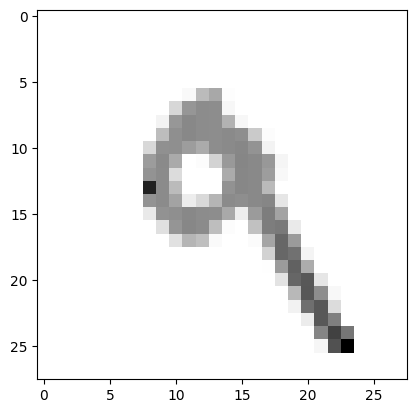

In [16]:
import matplotlib.pyplot as plt
plt.imshow(X_test[7],cmap=plt.cm.binary)
plt.show()

6


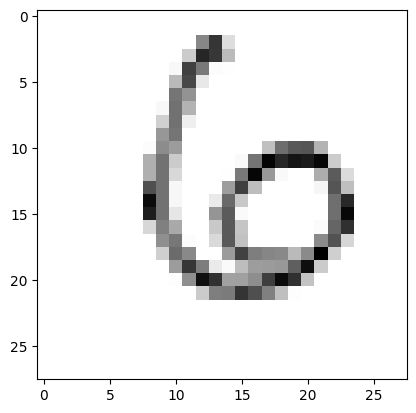

In [26]:
print(np.argmax(predictions[100]))
plt.imshow(X_test[100],cmap=plt.cm.binary)
plt.show()